### DEPENDENCIES

In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

### IMPORT CSV

In [2]:
#load assesment file

sbux = "resources/HistoricalData_SBUX.csv"
sbux_df = pd.read_csv(sbux)
sbux_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$112.52,5436295,$111.798,$113.03,$111.52
1,05/21/2021,$110.92,5146620,$111.63,$112.22,$110.57
2,05/20/2021,$111.41,5345545,$109.98,$111.69,$109.87
3,05/19/2021,$109.67,5997454,$109.6,$109.94,$108.88
4,05/18/2021,$111.07,5177382,$111.37,$112.21,$111.01


### CLEAN, RESHAPE AND CONVERT DATATYPE

In [3]:
sbux_df['Date']= pd.to_datetime(sbux_df['Date'])
sbux_df['Close/Last'] = sbux_df['Close/Last'].str.replace('$','')
sbux_df['Open'] = sbux_df['Open'].str.replace('$','')
sbux_df['High'] = sbux_df['High'].str.replace('$','')
sbux_df['Low'] = sbux_df['Low'].str.replace('$','')
sbux_df = sbux_df.apply( pd.to_numeric)

### FORMAT DATE COLUMN

In [4]:
sbux_df['Date']= pd.to_datetime(sbux_df['Date'])
sbux_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,112.52,5436295,111.798,113.03,111.52
1,2021-05-21,110.92,5146620,111.630,112.22,110.57
2,2021-05-20,111.41,5345545,109.980,111.69,109.87
3,2021-05-19,109.67,5997454,109.600,109.94,108.88
4,2021-05-18,111.07,5177382,111.370,112.21,111.01


### CREATE ADDITIONAL DATA

In [5]:
sbux_df['Open_Close'] = (sbux_df['Open'] - sbux_df['Close/Last'])/sbux_df['Open']
sbux_df['High_Low'] = (sbux_df['High'] - sbux_df['Low'])/sbux_df['Low']
sbux_df['Increase_Decrease'] = np.where(sbux_df['Volume'].shift(-1) > sbux_df['Volume'],1,0)
sbux_df['Buy_Sell_on_Open'] = np.where(sbux_df['Open'].shift(-1) > sbux_df['Open'],1,0)
sbux_df['Buy_Sell'] = np.where(sbux_df['Close/Last'].shift(-1) > sbux_df['Close/Last'],1,0)
sbux_df['Returns'] = sbux_df['Close/Last'].pct_change()
sbux_df = sbux_df.dropna()
sbux_df.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2021-05-21,110.92,5146620,111.63,112.22,110.57,0.006360,0.014923,1,0,1,-0.014220
2,2021-05-20,111.41,5345545,109.98,111.69,109.87,-0.013002,0.016565,1,0,0,0.004418
3,2021-05-19,109.67,5997454,109.60,109.94,108.88,-0.000639,0.009735,0,1,1,-0.015618
4,2021-05-18,111.07,5177382,111.37,112.21,111.01,0.002694,0.010810,0,0,0,0.012766
5,2021-05-17,110.98,4519580,111.22,111.27,109.83,0.002158,0.013111,1,0,1,-0.000810


### SPLIT DATAFRAME

In [6]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = sbux_df["Date"] >= start_date
before_end_date = sbux_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
sbux_df_4 = sbux_df.loc[between_two_dates]
sbux_df_4.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
252,2020-05-22,77.62,7653305,77.90,78.050,76.52,0.003594,0.019995,1,1,1,-0.001800
253,2020-05-21,78.05,10312640,78.60,79.375,77.89,0.006997,0.019065,0,0,0,0.005540
254,2020-05-20,77.76,7790481,77.23,77.840,76.52,-0.006863,0.017250,0,0,0,-0.003716
255,2020-05-19,75.86,6484878,76.40,77.225,75.76,0.007068,0.019337,1,1,1,-0.024434
256,2020-05-18,76.23,8912473,76.86,77.500,76.20,0.008197,0.017060,1,0,0,0.004877


### SPLIT DATAFRAME

In [7]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = sbux_df["Date"] >= start_date
before_end_date = sbux_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
sbux_df_ls = sbux_df.loc[between_two_dates]
sbux_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2021-05-21,110.92,5146620,111.63,112.22,110.57,0.006360,0.014923,1,0,1,-0.014220
2,2021-05-20,111.41,5345545,109.98,111.69,109.87,-0.013002,0.016565,1,0,0,0.004418
3,2021-05-19,109.67,5997454,109.60,109.94,108.88,-0.000639,0.009735,0,1,1,-0.015618
4,2021-05-18,111.07,5177382,111.37,112.21,111.01,0.002694,0.010810,0,0,0,0.012766
5,2021-05-17,110.98,4519580,111.22,111.27,109.83,0.002158,0.013111,1,0,1,-0.000810


### PLOT 1ST  DF (4YEARS)

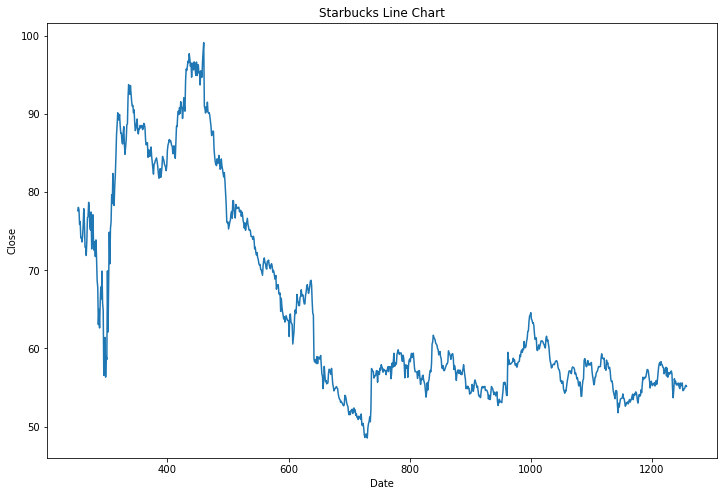

In [8]:
plt.figure(figsize=(12,8))
plt.plot(sbux_df_4['Close/Last'])
plt.title("Starbucks Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

### PLOT SECOND DF (LAST YEAR)

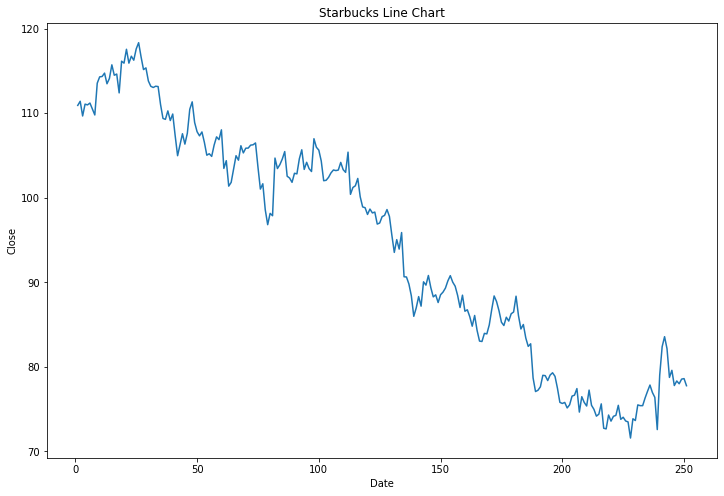

In [9]:
plt.figure(figsize=(12,8))
plt.plot(sbux_df_ls['Close/Last'])
plt.title("Starbucks Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

### SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [10]:
sbux_df_4.shape

(1006, 12)

In [11]:
X = np.array(sbux_df_4['Open']).reshape(1006,-1)
Y = np.array(sbux_df_4['Close/Last']).reshape(1006,-1)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X, Y)

LinearRegression()

In [14]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.29206959]
coefficient count: 1


In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.9961578307152368


In [16]:
# Predicting the price
lr.predict(X)

array([[77.86133869],
       [78.55836679],
       [77.19418324],
       ...,
       [55.41703413],
       [55.60622747],
       [55.25771342]])

In [17]:
#daily Return
DA_RE = sbux_df_4['Close/Last'].pct_change(1)
DA_RE.head()

252         NaN
253    0.005540
254   -0.003716
255   -0.024434
256    0.004877
Name: Close/Last, dtype: float64

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

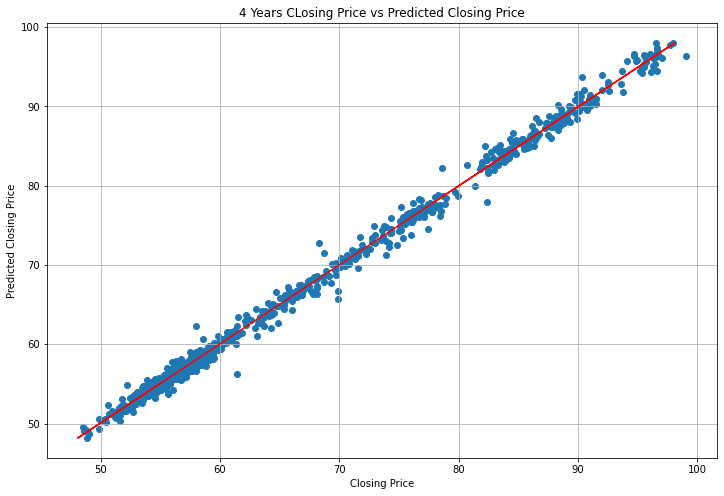

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(sbux_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/sbux_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

### TRAINING, TESTING ML ON 2ND DF

In [19]:
sbux_df_ls.shape

(251, 12)

In [20]:
X_ls = np.array(sbux_df_ls['Open']).reshape(251,-1)
Y_ls = np.array(sbux_df_ls['Close/Last']).reshape(251,-1)

In [21]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [22]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.10709064]
coefficient count: 1


In [23]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9926171417129118


In [24]:
# Predicting the price
lr.predict(X_ls)

array([[111.67053184],
       [110.02151564],
       [109.64174221],
       [111.41068686],
       [111.2607763 ],
       [111.05090151],
       [110.20140832],
       [111.91038874],
       [113.35952418],
       [114.60877888],
       [115.14845691],
       [113.68932742],
       [114.24899353],
       [115.18843306],
       [115.21841517],
       [114.03911874],
       [113.24958977],
       [113.47945263],
       [115.70812301],
       [116.98735982],
       [116.05791432],
       [116.90540871],
       [116.12787259],
       [116.99735385],
       [118.2066324 ],
       [117.85684108],
       [115.13846287],
       [115.25839132],
       [113.81924991],
       [113.05970306],
       [112.94976864],
       [113.68932742],
       [112.94976864],
       [111.4206809 ],
       [109.95155738],
       [110.10146794],
       [110.37130696],
       [108.46244578],
       [109.052094  ],
       [107.29314339],
       [105.05148077],
       [106.67351306],
       [107.78285123],
       [106

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

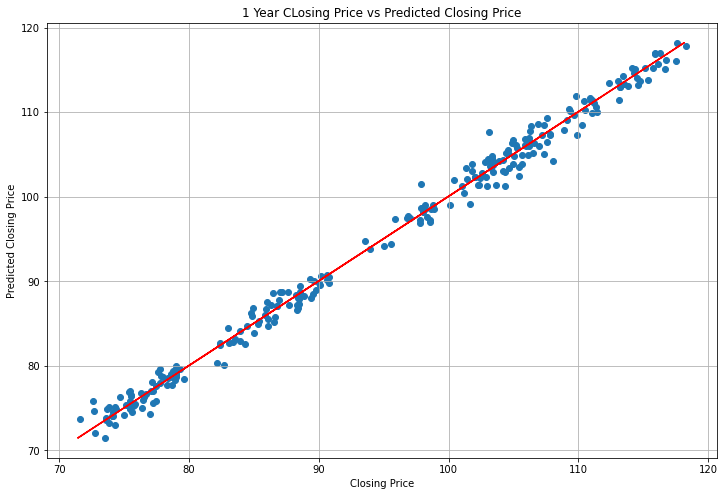

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(sbux_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/sbux_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')

### MODEL COMPARISON

<tr>
    <td> <img src="images/sbux_4y.jpg"style="width: 550px;"/> </td>
    <td> <img src="images/sbux_ls.jpg"style="width: 550px;"/> </td>
</tr>


In [26]:
sbux_df.shape

(1257, 12)

In [27]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [28]:
Xc = np.array(sbux_df['Returns'], dtype = float) # Feature
Yc = np.array(sbux_df['Close/Last'], dtype = float) # Target

In [29]:
model.fit(Xc, Yc, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 846us/step - loss: 2887.5591
Epoch 2/100
40/40 [==============================] - 0s 872us/step - loss: 818.3184
Epoch 3/100
40/40 [==============================] - 0s 872us/step - loss: 409.6368
Epoch 4/100
40/40 [==============================] - 0s 949us/step - loss: 325.7896
Epoch 5/100
40/40 [==============================] - 0s 821us/step - loss: 311.4669
Epoch 6/100
40/40 [==============================] - 0s 872us/step - loss: 308.2054
Epoch 7/100
40/40 [==============================] - 0s 821us/step - loss: 307.5822
Epoch 8/100
40/40 [==============================] - 0s 974us/step - loss: 307.4904
Epoch 9/100
40/40 [==============================] - 0s 846us/step - loss: 307.3990
Epoch 10/100
40/40 [==============================] - 0s 821us/step - loss: 307.3977
Epoch 11/100
40/40 [==============================] - 0s 821us/step - loss: 307.4671
Epoch 12/100
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 718us/step - loss: 307.5531
Epoch 98/100
40/40 [==============================] - 0s 744us/step - loss: 307.4564
Epoch 99/100
40/40 [==============================] - 0s 692us/step - loss: 307.4410
Epoch 100/100
40/40 [==============================] - 0s 744us/step - loss: 307.4267


In [30]:
scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(np.array(sbux_df['Returns']).reshape(1257,-1))
X = np.array(normalized_X, dtype = float)
normalized_Y = scaler.fit_transform(np.array(sbux_df['Close/Last']).reshape(1257,-1))
Y = np.array(normalized_Y, dtype = float)

In [31]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [32]:
print((model.predict([0])))

[[70.91989]]
